## Procesamiento de Imagenes
Alumno: Eduardo Farfán

# Muestreo y Cuantización
Consigna:

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.

b) Para cada caso, calcular:
   * El nuevo tamaño de la imagen
   * El porcentaje de reducción de datos

c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)

d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?


In [1]:
# Importamos las librerias necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Descarga de la imagen a tratar

In [ ]:

!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/253055.jpg



# 1. CARGA Y VISUALIZACIÓN DE LA IMAGEN ORIGINAL
---
### Lectura de la imagen. La imagen ya está en escala de grises

In [ ]:
#imagen_original = cv2.imread('253055.jpg', cv2.IMREAD_GRAYSCALE)

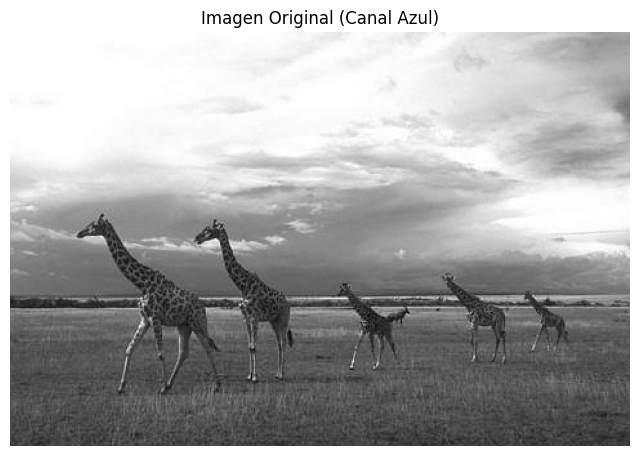

Tamaño = (321, 481)
Máximo = 255
Mínimo = 46


In [27]:
from cv2 import imread
# Función para mostrar info básica
def howis(img):
    print('Tamaño =', img.shape)
    print('Máximo =', np.max(img))
    print('Mínimo =', np.min(img))

# Cargar la imagen original (solo canal azul, que es el primero en OpenCV)
X = imread('253055.jpg')
X = X[:, :, 0]  # O BGR

# Mostrar la imagen original en escala de grises
plt.figure(figsize=(8, 8))
plt.imshow(X, cmap='gray')
plt.title('Imagen Original (Canal Azul)')
plt.axis('off')
plt.show()

howis(X)

In [7]:
#Guardamos la imagen original en un canal 0 8(Blue)
imagen_original = imread('253055.jpg')
imagen_original = imagen_original[:, :, 0]  # O BGR

# 2. MUESTREO ESPACIAL
-----

El muestreo espacial consiste en reducir la resolución de una imagen
tomando solo una parte de los píxeles originales.

Conceptualmente, es como colocar una cuadrícula más gruesa sobre la imagen
y seleccionar un único píxel por cada celda de la cuadrícula.

Cuando aplicamos un factor de muestreo 2, tomamos 1 de cada 2 píxeles,
tanto en filas como en columnas, reduciendo el tamaño de la imagen original.

## Funcion para reducir la resolución de la imagen original
- seleccionando solo 1 píxel cada cierta cantidad, según el factor.

- Utiliza indexación NumPy:
imagen[::factor, ::factor]

Esto selecciona según el factor usado factor = 2, entonces:

Se toma 1 de cada 2 filas → filas: 0, 2, 4, ..., 320 (aproximadamente la mitad)

Se toma 1 de cada 2 columnas → columnas: 0, 2, 4, ..., 480

In [15]:
def aplicar_muestreo(imagen, factor):
    """
    Función que implementa el muestreo espacial.

    Parámetros:
    - imagen: Imagen de entrada
    - factor: Factor de muestreo (2, 4, 8, etc.)

    Retorna:
    - imagen_muestreada: Imagen con menor resolución
    """
    return imagen[::factor, ::factor]

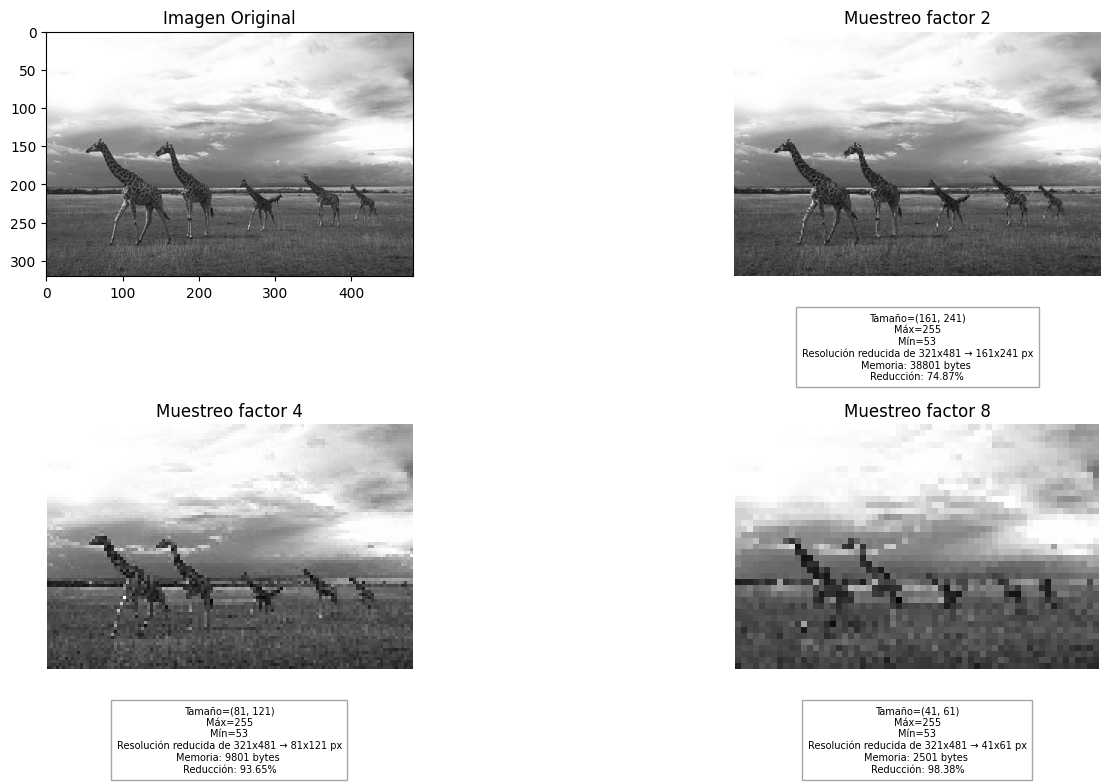

In [29]:
# Aplicamos muestreo con diferentes factores
factores = [2, 4, 8]
imagenes_muestreadas = []

# Dimensiones originales
alto_original, ancho_original = imagen_original.shape

# Creamos una figura para mostrar la imagen original y las muestreadas
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')
plt.axis('on')


for i, factor in enumerate(factores):
    # Aplicamos el muestreo
    imagen_muestreada = aplicar_muestreo(imagen_original, factor)
    imagenes_muestreadas.append(imagen_muestreada)

    # Cálculos de medidas
    nuevo_alto, nuevo_ancho = imagen_muestreada.shape
    nuevo_tamano_bytes = imagen_muestreada.nbytes
    tamano_original_bytes = imagen_original.nbytes
    porcentaje_reduccion = (1 - nuevo_tamano_bytes / tamano_original_bytes) * 100
    maximo = imagen_muestreada.max()
    minimo = imagen_muestreada.min()

    # Mostramos la imagen
    plt.subplot(2, 2, i + 2)
    plt.imshow(imagen_muestreada, cmap='gray')
    plt.axis('off')
    plt.title(f'Muestreo factor {factor}')

    # Texto informativo
    texto_info = (
        f"Tamaño=({nuevo_alto}, {nuevo_ancho})\n"
        f"Máx={maximo}\n"
        f"Mín={minimo}\n"
        f"Resolución reducida de {alto_original}x{ancho_original} → {nuevo_alto}x{nuevo_ancho} px\n"
        f"Memoria: {nuevo_tamano_bytes} bytes \n"
        f"Reducción: {porcentaje_reduccion:.2f}%"
    )

    # Insertar el texto abajo de la imagen
    plt.text(
        0.5, -0.15, texto_info,
        transform=plt.gca().transAxes,
        fontsize=7, ha='center', va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )


plt.tight_layout()
plt.show()


### Podemos decir que en el  Muestreo Espacial:

   - Con factor 2: Reducción del 74,87% en los datos de la imagen, se puede observar una pequeña distorsion de la imagen en comparación con la original.
   - Con factor 4: Reducción del 93.75%, se observa una distorsion notoria en los animales y la vegetación pero se puede identificar o relacionar la imagen.
   - Con factor 8: Reducción del 98.44% en datos, aqui no se identifica de que trata la imagen se observa objetos en las misma pero bastante distorcionadas sin poder identificar de que se trata la imagen.
   
   La pérdida de detalles se vuelve significativa con factores grandes,
   especialmente en las manchas de las jirafas y la textura de la vegetación.


### 3. CUANTIZACIÓN
-------------

La cuantización reduce el número de niveles de intensidad en la imagen.

En una imagen de 8 bits, normalmente hay 256 niveles de gris (0-255).
Al cuantizar, agrupamos estos valores en menos niveles.

Por ejemplo, con 32 niveles, cada grupo de 8 valores consecutivos (256/32=8)
se representa con un único valor. Esto reduce la cantidad de información
y puede crear un efecto de "bandas" en áreas con
gradientes suaves como cielos o sombras.



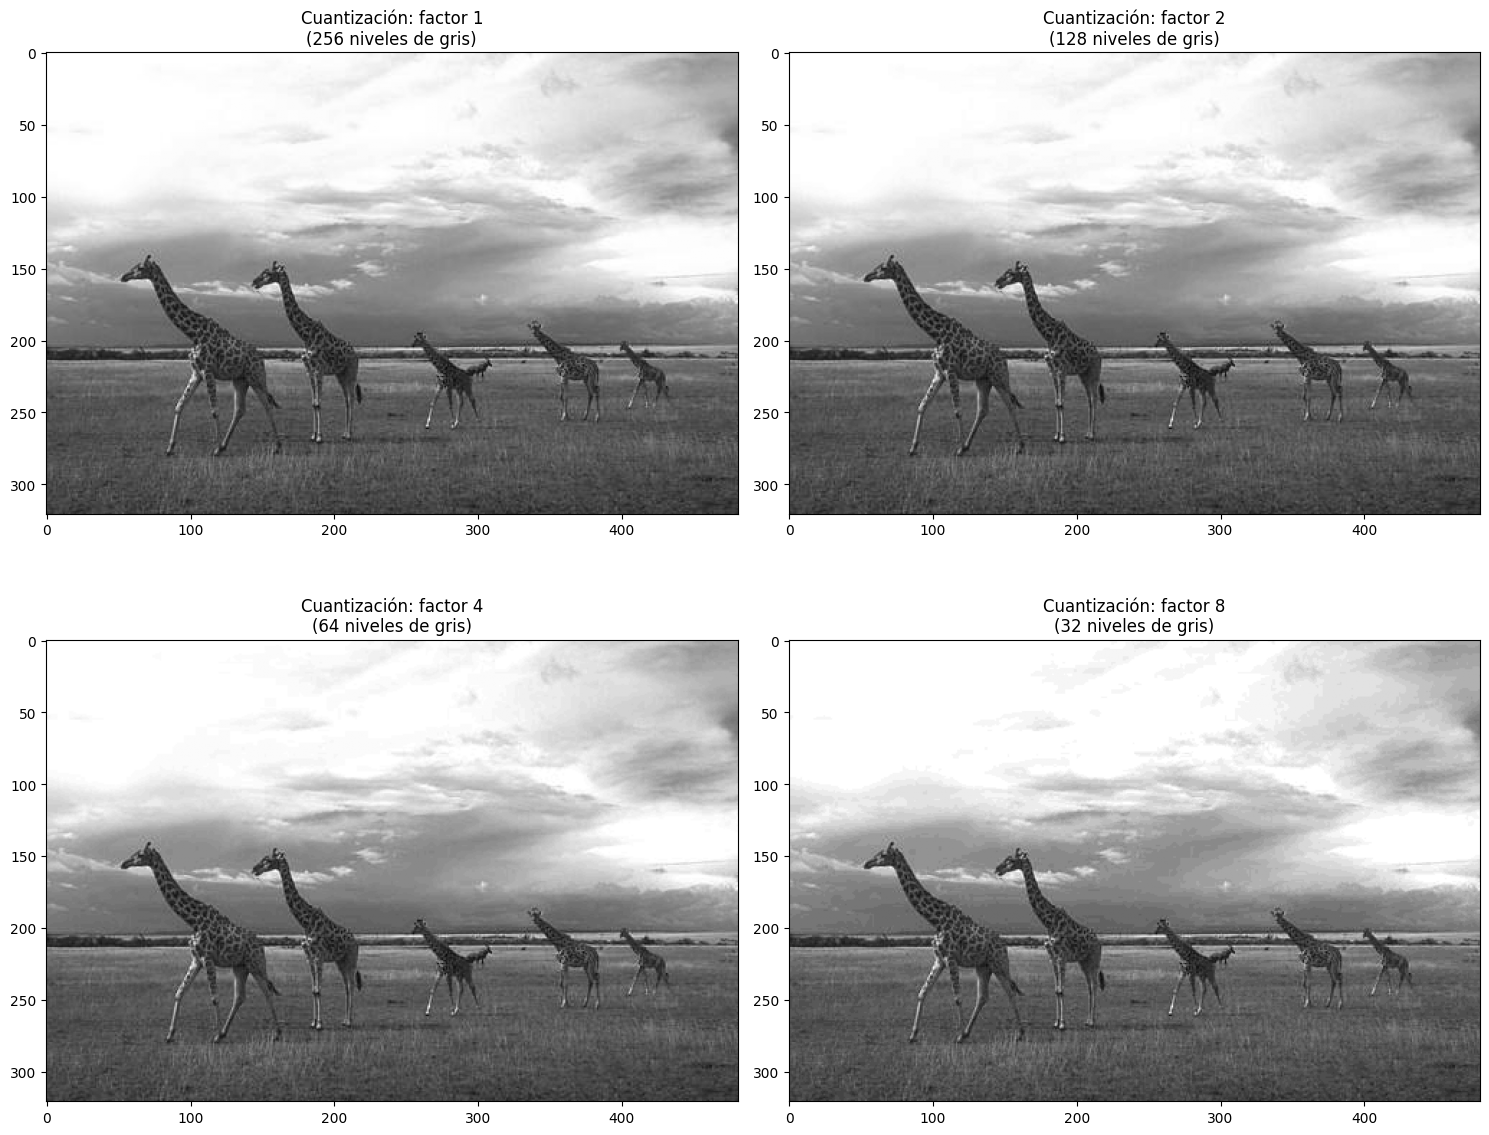

In [30]:
# Aplicamos cuantización con diferentes factores
factores_cuantizacion = [1, 2, 4, 8]  # Factores de cuantización
niveles = [int(256/q) for q in factores_cuantizacion]  # Corresponden a 256, 128, 64, 32 niveles
imagenes_cuantizadas = []

# Mostramos la imagen original y las diferentes cuantizaciones
plt.figure(figsize=(15, 12))

for i, (q, nivel) in enumerate(zip(factores_cuantizacion, niveles)):
    # Aplicamos la cuantización según el código base
    Z = np.floor(imagen_original/q)*q  # Agrupa valores en intervalos de tamaño q
    Z = Z.astype(np.uint8)             # Convierte a enteros 0-255
    imagenes_cuantizadas.append(Z)

    # Visualizamos la imagen cuantizada
    plt.subplot(2, 2, i+1)
    plt.imshow(Z, cmap='gray')
    plt.title(f'Cuantización: factor {q}\n({nivel} niveles de gris)')
    plt.axis('on')

plt.tight_layout()
plt.show()


Imagen cuantizada (factor 1):
Esta imagen tiene 256 niveles de gris (original: 256)
Dimensiones: 481 x 321 píxeles
Valor mínimo: 46, Valor máximo: 255

Imagen cuantizada (factor 2):
Esta imagen tiene 128 niveles de gris (original: 256)
Dimensiones: 481 x 321 píxeles
Valor mínimo: 46, Valor máximo: 254

Imagen cuantizada (factor 4):
Esta imagen tiene 64 niveles de gris (original: 256)
Dimensiones: 481 x 321 píxeles
Valor mínimo: 44, Valor máximo: 252

Imagen cuantizada (factor 8):
Esta imagen tiene 32 niveles de gris (original: 256)
Dimensiones: 481 x 321 píxeles
Valor mínimo: 40, Valor máximo: 248



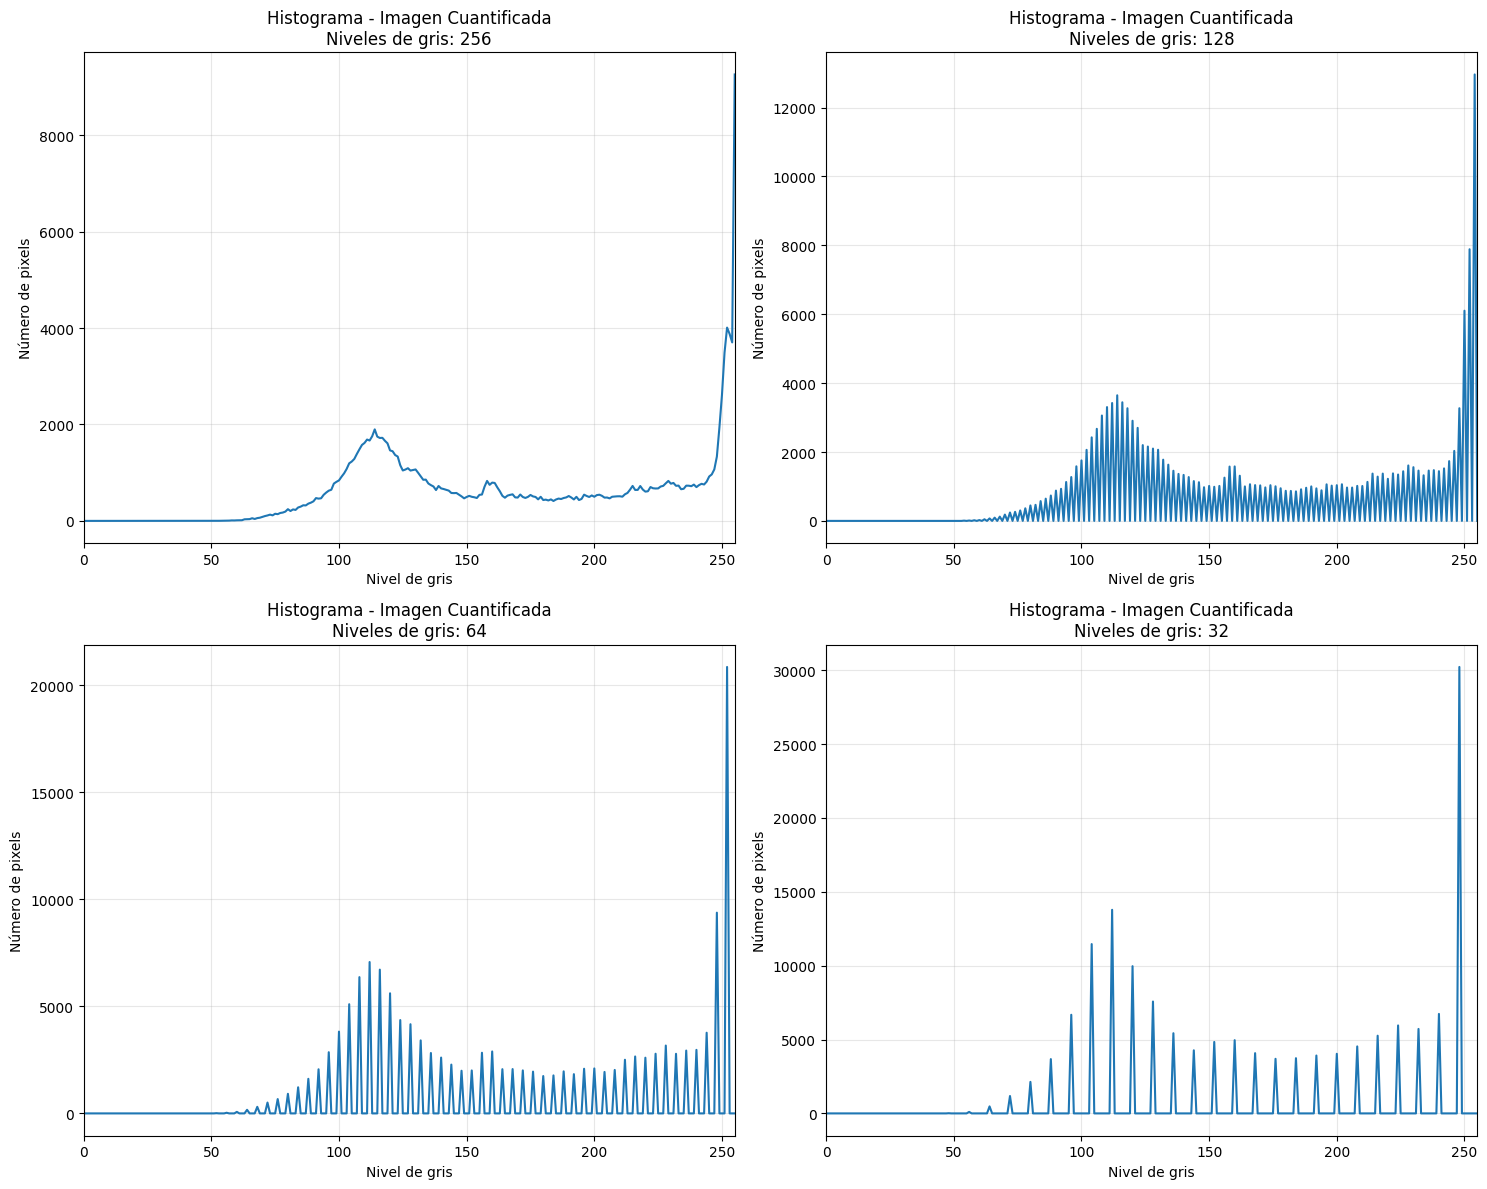

In [31]:

# Información sobre las imágenes cuantizadas
for q, nivel, img in zip(factores_cuantizacion, niveles, imagenes_cuantizadas):
    print(f"Imagen cuantizada (factor {q}):")
    print(f"Esta imagen tiene {nivel} niveles de gris (original: 256)")
    print(f"Dimensiones: {img.shape[1]} x {img.shape[0]} píxeles")
    print(f"Valor mínimo: {np.min(img)}, Valor máximo: {np.max(img)}")
    print()

# Función para calcular el histograma
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

# Visualizamos los histogramas de las imágenes cuantizadas
plt.figure(figsize=(15, 12))

for i, (q, nivel, img) in enumerate(zip(factores_cuantizacion, niveles, imagenes_cuantizadas)):
    plt.subplot(2, 2, i+1)
    plt.plot(hist(img))
    plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {nivel}')
    plt.xlabel('Nivel de gris')
    plt.ylabel('Número de pixels')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 255)

plt.tight_layout()
plt.show()


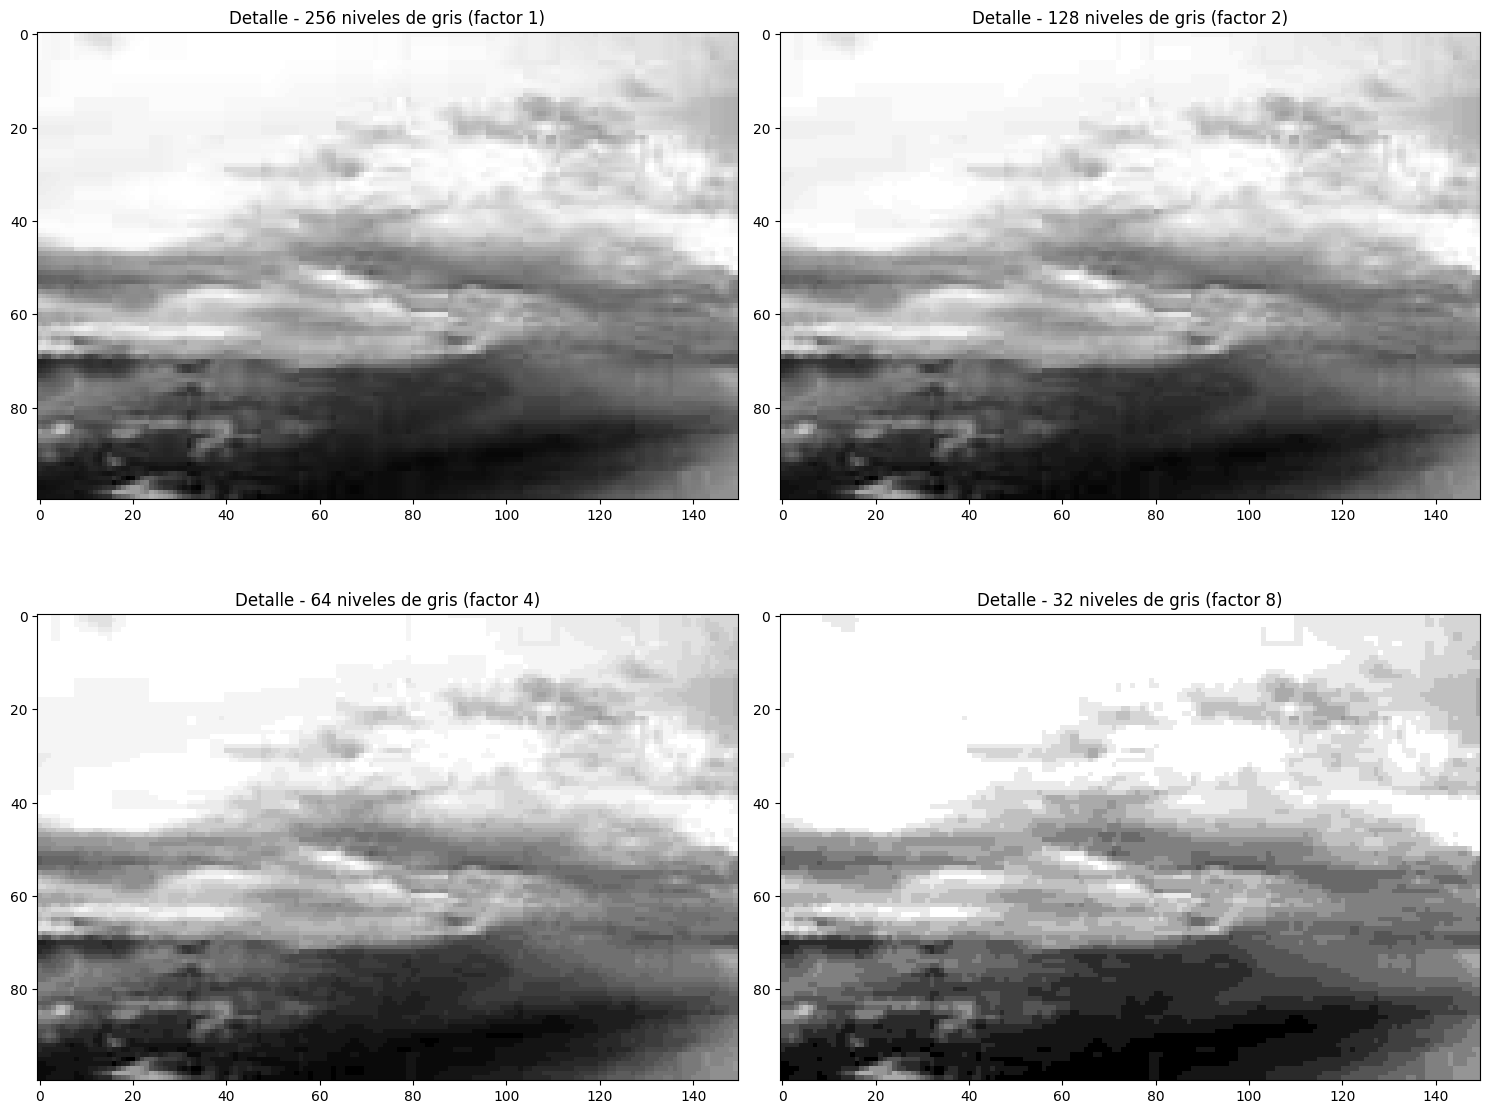

In [32]:
# Visualización detallada para analizar la degradación
# Seleccionamos una región con gradientes suaves (como el cielo)
y_inicio, x_inicio = 50, 200  # Coordenadas de la región de interés
alto_roi, ancho_roi = 100, 150  # Tamaño de la región

plt.figure(figsize=(15, 12))
for i, (q, nivel, img) in enumerate(zip(factores_cuantizacion, niveles, imagenes_cuantizadas)):
    # Extraemos la región de interés
    roi = img[y_inicio:y_inicio+alto_roi, x_inicio:x_inicio+ancho_roi]

    # Mostramos la ROI ampliada
    plt.subplot(2, 2, i+1)
    plt.imshow(roi, cmap='gray')
    plt.title(f'Detalle - {nivel} niveles de gris (factor {q})')

plt.tight_layout()
plt.show()


### Análisis y conclusiones

ANÁLISIS DE LA CUANTIZACIÓN:

La cuantización reduce la profundidad de bits de una imagen, agrupando valores
de intensidad cercanos en un mismo nivel.

Observaciones:
1. Con 256 niveles (q=1): No hay pérdida, es la imagen original de 8 bits.
2. Con 128 niveles (q=2): La degradación es mínima y apenas perceptible.
3. Con 64 niveles (q=4): Comienzan a aparecer contornos falsos o "bandas"
   en áreas con gradientes suaves como el cielo.
4. Con 32 niveles (q=8): El efecto de posterización es claramente visible.

En los histogramas podemos observar:
- A mayor factor de cuantización, el histograma tiene menos barras ocupadas
  y están más separadas entre sí.
- Los "picos" en el histograma representan los únicos valores permitidos
  en la imagen cuantizada.

CONCLUSIÓN:
La degradación por cuantización comienza a ser visualmente perceptible
cuando se reduce a 64 niveles o menos (factor q=4 o mayor). Este efecto
es especialmente notable en áreas con gradientes suaves como el cielo,
donde aparecen bandas o contornos falsos.

La inspección visual de los histogramas confirma esta observación,
mostrando una separación muy marcada entre los valores de intensidad
cuando tenemos 64 niveles o menos.

* Profundidad de bits: Número de niveles de gris posibles (8 bits = 256 niveles)
* Cuantización: Proceso de reducir la profundidad de bits de una imagen
* Posterización: Efecto visual de "bandas" que ocurre cuando hay pocos
  niveles de gris (cuantización grande)
* Error de cuantización: Diferencia entre la imagen original y la cuantizada
